In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_mood_smartphone.csv')

In [3]:
df.tail()


,Unnamed: 0,id,time,variable,value
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033
376911,2784435,AS14.32,2014-04-07 18:25:14.036,appCat.weather,22.431


In [7]:
print(df["id"].unique())
#df["id"].hist()

dfm = df.as_matrix()
print(dfm)
# for each user
# For each record, get the timestamp and the variable+value
# Each timestamp,var,val triple is one row

['AS14.01' 'AS14.02' 'AS14.03' 'AS14.05' 'AS14.06' 'AS14.07' 'AS14.08'
 'AS14.09' 'AS14.12' 'AS14.13' 'AS14.14' 'AS14.15' 'AS14.16' 'AS14.17'
 'AS14.19' 'AS14.20' 'AS14.23' 'AS14.24' 'AS14.25' 'AS14.26' 'AS14.27'
 'AS14.28' 'AS14.29' 'AS14.30' 'AS14.31' 'AS14.32' 'AS14.33']
[[1 'AS14.01' '2014-02-26 13:00:00.000' 'mood' 6.0]
 [2 'AS14.01' '2014-02-26 15:00:00.000' 'mood' 6.0]
 [3 'AS14.01' '2014-02-26 18:00:00.000' 'mood' 6.0]
 ...
 [2774026 'AS14.30' '2014-04-26 10:19:07.434' 'appCat.weather' 7.026]
 [2774133 'AS14.30' '2014-04-27 00:44:48.450' 'appCat.weather' 23.033]
 [2784435 'AS14.32' '2014-04-07 18:25:14.036' 'appCat.weather'
  22.430999999999997]]


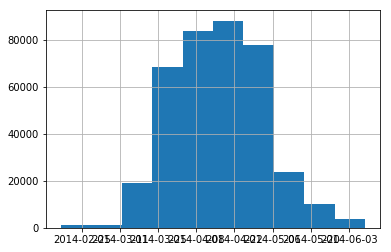

In [37]:
dfT = df["time"].apply(pd.Timestamp)
dfT.hist()

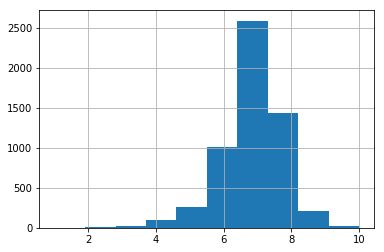

In [28]:
df[df.variable=="mood"]["value"].hist()

The following code calculates daily averages of the moods (first part of assignment). Ends up with 2 dictionaries, one for the days and one for the avg moods (in the form dict[user]=days_list or moods_list)

In [111]:
# cell takes a while to run

# all users
users = list(df.id.unique())
days_dict = {}
avg_moods_dict = {}

for i in range(len(users)):
    # specify user
    user = df[df.id == users[i]]

    # all days with data for the user
    #days = sorted(set([x.split()[0] for x in list(user['time'])]))

    pd.set_option('display.max_columns', 50)

    # get all days on which the user's mood is known (mood_days)
    mood_days = sorted(set([x.split()[0] for x in list(user[user.variable=="mood"]['time'])]))

    average_moods = []
    for day in mood_days:
        day_df = user[user['time'].str.contains(day)]
        avg_mood = day_df[df.variable=="mood"].value.mean()
        average_moods.append(avg_mood)

    days_dict[users[i]] = mood_days
    avg_moods_dict[users[i]] = average_moods


/Users/mounirhader/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [91]:
len(days_dict[5]), len(avg_moods_dict[5])

(48, 48)

In [112]:
# format dates to date objects for checking consecutive dates

import datetime

for user in days_dict:
    days = days_dict[user]
    dates = []
    for day in days:
        day_ints = [int(x) for x in day.split('-')]
        dates.append(datetime.date(day_ints[0], day_ints[1], day_ints[2]))
    days_dict[user] = dates

In [125]:
# check if the data is consecutive
# for creating the dataset from figure 2 in assignment

users = list(days_dict)
days_dict[users[5]]

print 'The following dates in the data are not consecutive:\n'
for user in users:
    days = days_dict[user]
    length = len(days_dict[user]) - 1
    for i in range(len(days)):
        # make sure to not exceed the size of the days list when indexing
        if i + 1 <= length: 
            if (days[i+1] - days[i]).days == 1:
                pass #difference is one day = good
            else:
                print "{} {} {}\n".format(user, days[i], days[i+1])
        else:
            pass

The following dates in the data are not consecutive:

AS14.17 2014-03-14 2014-03-21

AS14.17 2014-05-03 2014-05-05

AS14.16 2014-05-02 2014-05-04

AS14.15 2014-05-05 2014-05-07

AS14.14 2014-04-12 2014-04-14

AS14.14 2014-04-27 2014-04-30

AS14.12 2014-03-15 2014-03-27

AS14.33 2014-05-01 2014-05-04

AS14.33 2014-05-05 2014-05-07

AS14.32 2014-04-18 2014-04-21

AS14.32 2014-04-21 2014-04-23

AS14.32 2014-04-25 2014-04-27

AS14.32 2014-05-05 2014-05-07

AS14.28 2014-05-05 2014-05-07

AS14.29 2014-05-01 2014-05-03

AS14.29 2014-05-05 2014-05-07

AS14.06 2014-05-05 2014-05-07

AS14.01 2014-02-27 2014-03-21

AS14.03 2014-05-05 2014-05-07

AS14.26 2014-05-05 2014-05-07

AS14.27 2014-05-05 2014-05-07

AS14.24 2014-05-05 2014-05-07

AS14.25 2014-05-05 2014-05-07

AS14.23 2014-04-13 2014-04-15

AS14.31 2014-05-05 2014-05-07



<h1>Thoughts and ideas</h1>
- implement weekdays/weekend days separate features?